In [2]:
import pvdeg

In [3]:
dynamic_points = pvdeg.scenario.GeospatialScenario(
    name='dynamic-selection'
)

dynamic_points.addLocation(
    state=['CO'],#, 'UT', 'NM', 'NV', 'ID', 'WY', 'AZ', 'CA', 'OR', 'WA'],
    downsample_factor=1
)

/home/tford/.conda-envs/rpp/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


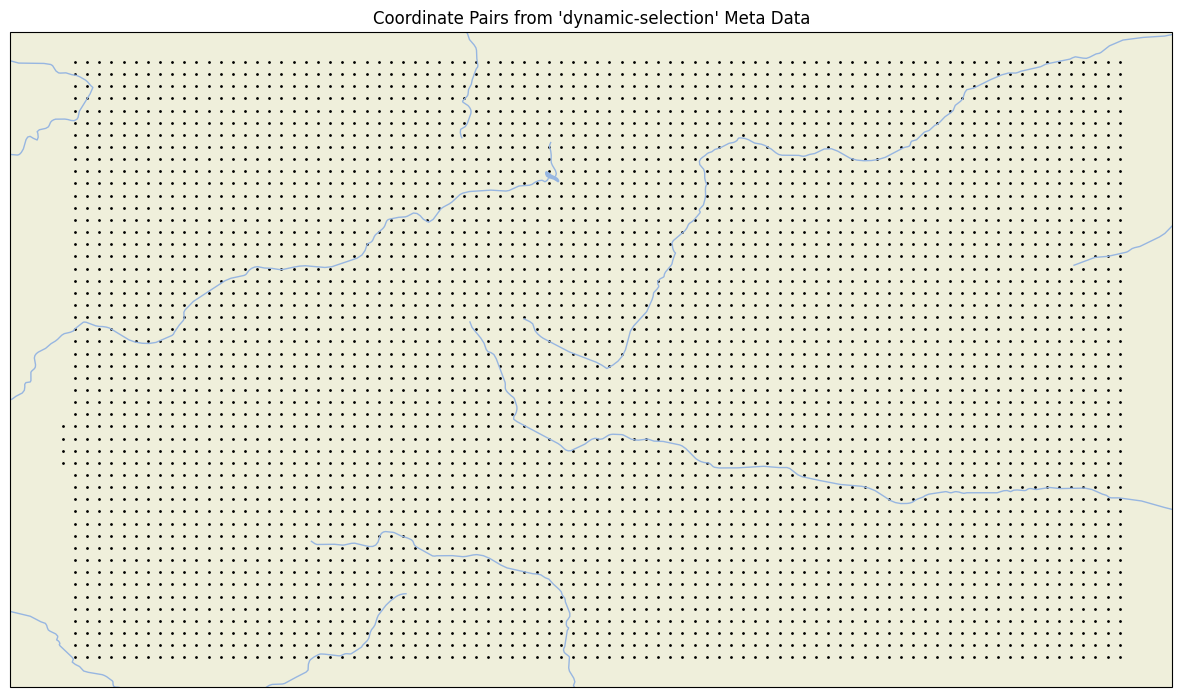

In [4]:
dynamic_points.plot_coords(
    # coord_1 = [48.574790, -130.253906], # uncomment to see Larger scale view
    # coord_2 = [25.482951, -68.027344],
    # size = 0.005
)

In [5]:
west_tree = pvdeg.geospatial.meta_KDtree(meta_df=dynamic_points.meta_data)

dynamic_points.downselect_elevation_stochastic(
    kdtree=west_tree,
    downselect_prop=0.01,
)

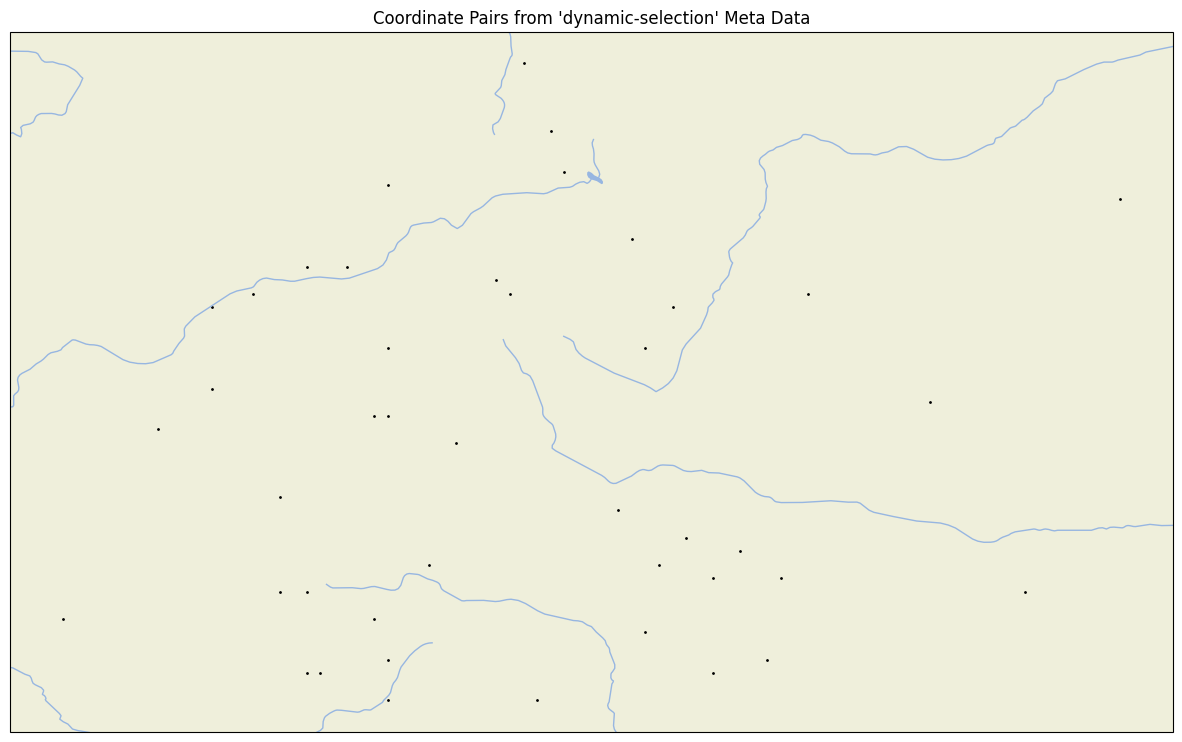

In [6]:
dynamic_points.plot_coords()

In [7]:
dynamic_points.weather_data

<xarray.Dataset> Size: 2TB
Dimensions:            (time: 17520, gid: 2018267)
Coordinates:
  * gid                (gid) int64 16MB 0 1 2 3 ... 2018264 2018265 2018266
  * time               (time) datetime64[ns] 140kB 2022-01-01 ... 2022-12-31T...
Data variables:
    temp_air           (time, gid) float64 283GB dask.array<chunksize=(17520, 500), meta=np.ndarray>
    wind_speed         (time, gid) float64 283GB dask.array<chunksize=(17520, 500), meta=np.ndarray>
    dhi                (time, gid) float64 283GB dask.array<chunksize=(17520, 500), meta=np.ndarray>
    ghi                (time, gid) float64 283GB dask.array<chunksize=(17520, 500), meta=np.ndarray>
    dni                (time, gid) float64 283GB dask.array<chunksize=(17520, 500), meta=np.ndarray>
    relative_humidity  (time, gid) float64 283GB dask.array<chunksize=(17520, 500), meta=np.ndarray>
Attributes:
    full_version_record:  {"rex": "0.2.80", "pandas": "2.0.0", "numpy": "1.23...
    package:              rex
    version:              4.0.0

In [8]:
dynamic_points.meta_data.index.values

array([470383, 474417, 391661, 466416, 494871, 416273, 468363, 528155,
       410933, 432500, 434353, 451122, 423492, 434307, 470425, 410921,
       439836, 490806, 513478, 458705, 434317, 472430, 419899, 425305,
       484651, 428856, 434283, 434359, 449219, 452991, 488766, 423504,
       443565, 423444, 480564, 454984, 456802, 432530, 542824, 403860,
       480578, 476481, 419885])

In [9]:
weather = dynamic_points.weather_data

sub_weather = weather.sel(gid=dynamic_points.meta_data.index) # downselect weather

sub_weather.compute() # load into memory

<xarray.Dataset> Size: 36MB
Dimensions:            (time: 17520, gid: 43)
Coordinates:
  * gid                (gid) int64 344B 470383 474417 391661 ... 476481 419885
  * time               (time) datetime64[ns] 140kB 2022-01-01 ... 2022-12-31T...
Data variables:
    temp_air           (time, gid) float64 6MB -6.1 -3.5 -1.4 ... -4.5 0.2 1.9
    wind_speed         (time, gid) float64 6MB 1.1 1.7 0.8 4.1 ... 2.9 2.5 1.1
    dhi                (time, gid) float64 6MB 0.0 0.0 0.0 ... 24.0 21.0 17.0
    ghi                (time, gid) float64 6MB 0.0 0.0 0.0 ... 24.0 25.0 17.0
    dni                (time, gid) float64 6MB 0.0 0.0 0.0 0.0 ... 4.0 86.0 0.0
    relative_humidity  (time, gid) float64 6MB 86.44 73.52 100.0 ... 75.57 84.52
Attributes:
    full_version_record:  {"rex": "0.2.80", "pandas": "2.0.0", "numpy": "1.23...
    package:              rex
    version:              4.0.0

The array tilt angle was not provided, therefore the latitude tilt of 38.8 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 37.6 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 38.3 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 37.2 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 39.4 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 38.9 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provi

In [10]:
# geospatial analysis now

geo = {
    "func": pvdeg.standards.standoff,
    "weather_ds": sub_weather,
    "meta_df": dynamic_points.meta_data,
}

analysis_result = pvdeg.geospatial.analysis(**geo)

In [11]:
analysis_result

<xarray.Dataset> Size: 22kB
Dimensions:    (latitude: 28, longitude: 32)
Coordinates:
  * latitude   (latitude) float32 112B 37.09 37.25 37.33 ... 40.21 40.45 40.85
  * longitude  (longitude) float32 128B -109.0 -108.4 -108.1 ... -103.3 -102.7
Data variables:
    x          (latitude, longitude) float64 7kB nan nan nan nan ... nan nan nan
    T98_0      (latitude, longitude) float64 7kB nan nan nan nan ... nan nan nan
    T98_inf    (latitude, longitude) float64 7kB nan nan nan nan ... nan nan nan
Attributes:
    long_name:  Standoff dataset

(<Figure size 640x480 with 2 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

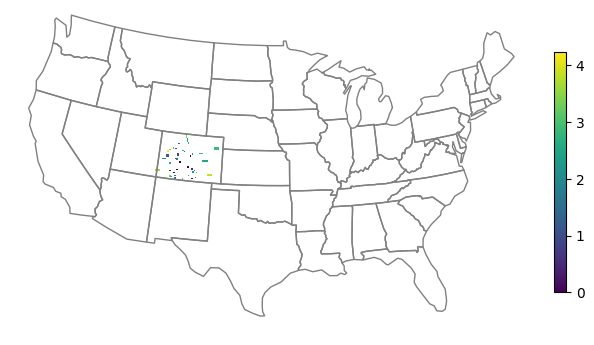

In [12]:
pvdeg.geospatial.plot_USA(analysis_result['x'])

In [38]:
co_box = pvdeg.utilities.get_state_bbox('CO')
print(np.flip])
# pvdeg.geospatial.plot_USA(analysis_result['x'], bbox_coords=co_box)

[  36.99242401 -109.06025696   41.0023613  -102.0415802 ]


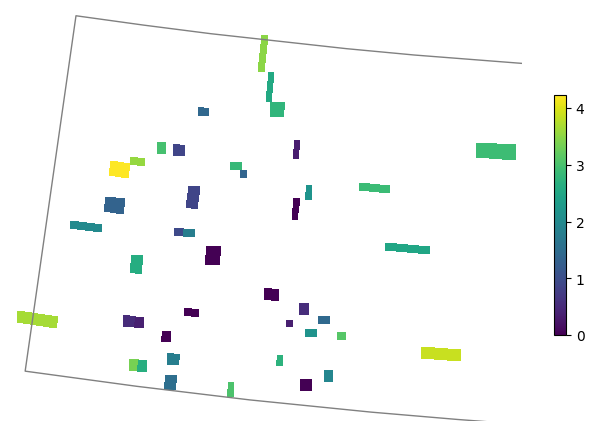

In [134]:
import numpy as np

standoff = analysis_result['x'].values
lon = xr_res['longitude'].values
lat = xr_res['latitude'].values

lon_grid, lat_grid = np.meshgrid(lon, lat)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(), frameon=False)
ax.patch.set_visible(False)


shapename = "admin_1_states_provinces_lakes"
states_shp = shpreader.natural_earth(
    resolution="110m", category="cultural", name=shapename
)

for record in shpreader.Reader(states_shp).records():
    if record.attributes['name'] == 'Colorado':
        ax.add_geometries(
            [record.geometry],
            ccrs.PlateCarree(),
            facecolor="none",
            edgecolor="gray",
        )
        break

im = ax.pcolormesh(
    lon_grid, lat_grid, standoff,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    shading='auto'  # Ensures smooth interpolation between grid cells
)

cb = plt.colorbar(im, ax=ax, shrink=0.5)
cb.set_label(cb_title)
ax.set_title(title)

plt.show()



In [135]:
# use xarray interpolation
from copy import deepcopy
ds_copy = deepcopy(analysis_result)

In [145]:
# remove nans from original data
ds_filled = ds_copy.interpolate_na(dim="latitude", method="linear", fill_value="extrapolate")
ds_filled = ds_filled.interpolate_na(dim="longitude", method="linear", fill_value="extrapolate")
ds_filled

<xarray.Dataset> Size: 22kB
Dimensions:    (latitude: 28, longitude: 32)
Coordinates:
  * latitude   (latitude) float32 112B 37.09 37.25 37.33 ... 40.21 40.45 40.85
  * longitude  (longitude) float32 128B -109.0 -108.4 -108.1 ... -103.3 -102.7
Data variables:
    x          (latitude, longitude) float64 7kB -27.1 -16.07 ... 90.71 114.1
    T98_0      (latitude, longitude) float64 7kB 8.352 32.96 ... 458.6 558.7
    T98_inf    (latitude, longitude) float64 7kB -22.08 3.88 ... 402.3 493.5
Attributes:
    long_name:  Standoff dataset

In [136]:
lats = np.linspace(ds_copy['latitude'].min(), ds_copy['latitude'].max(), 500)
longs = np.linspace(ds_copy['longitude'].min(), ds_copy['longitude'].max(), 500)

In [137]:
ds_inter = ds_copy.interp(latitude = lats, longitude = longs, method = "linear")

nan

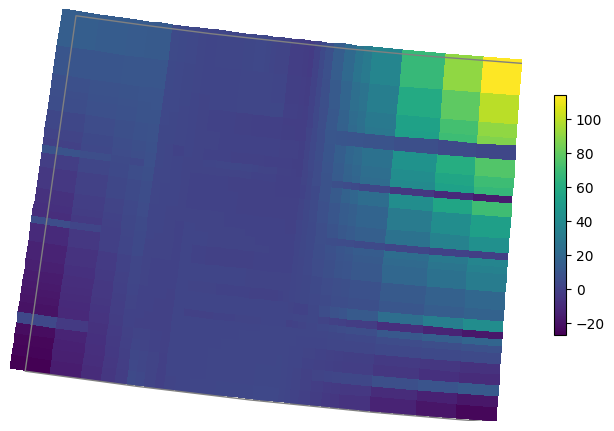

In [146]:
import numpy as np

standoff = ds_filled['x'].values
lon = ds_filled['longitude'].values
lat = ds_filled['latitude'].values

lon_grid, lat_grid = np.meshgrid(lon, lat)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(), frameon=False)
ax.patch.set_visible(False)


shapename = "admin_1_states_provinces_lakes"
states_shp = shpreader.natural_earth(
    resolution="110m", category="cultural", name=shapename
)

for record in shpreader.Reader(states_shp).records():
    if record.attributes['name'] == 'Colorado':
        ax.add_geometries(
            [record.geometry],
            ccrs.PlateCarree(),
            facecolor="none",
            edgecolor="gray",
        )
        break

im = ax.pcolormesh(
    lon_grid, lat_grid, standoff,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    shading='auto'  # Ensures smooth interpolation between grid cells
)

cb = plt.colorbar(im, ax=ax, shrink=0.5)
cb.set_label(cb_title)
ax.set_title(title)

plt.show()

In [148]:
ds_2 = deepcopy(analysis_result)

In [203]:
standoff = ds_2['x']

df = standoff.to_dataframe().reset_index()
df = df.dropna(subset=['x'])
data = np.column_stack((df['latitude'], df['longitude'], df['x'])) # probably a nicer way to do this

grid_lat, grid_lon = np.mgrid[df['latitude'].min():df['latitude'].max():100j, 
                              df['longitude'].min():df['longitude'].max():100j]

import scipy
grid_z = scipy.interpolate.griddata(data[:,0:2], data[:,2], xi=(grid_lat, grid_lon), method='nearest')

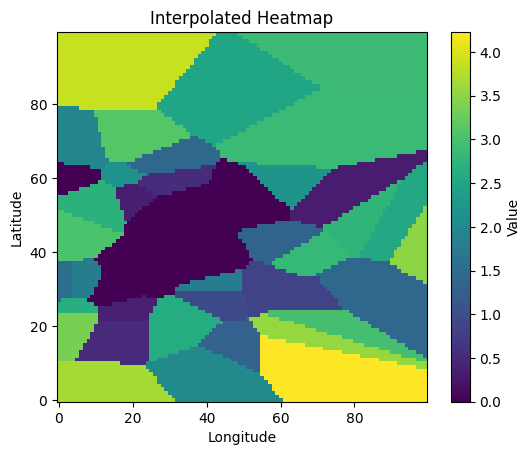

In [204]:
plt.imshow(grid_z.T, origin='lower', cmap='viridis')
plt.colorbar(label='Value')
plt.title('Interpolated Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()